In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]


In [5]:
# Label encode species
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])


In [6]:
# Select all features and target
X = df.iloc[:, :-1]  # All columns except species
y = df.iloc[:, -1]   # Species (encoded)

In [7]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
# Train softmax regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [11]:
# Print results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [12]:
print(sample_scaled = scaler.transform(sample))

TypeError: 'sample_scaled' is an invalid keyword argument for print()

In [13]:
# Predict probabilities for a sample
sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)
sample_scaled = scaler.transform(sample)
sample_scaled = pd.DataFrame(sample_scaled, columns=X.columns)
probs = model.predict_proba(sample_scaled)
pred_class = model.predict(sample_scaled)
print(f"Sample prediction: {encoder.inverse_transform(pred_class)[0]}")
print(f"Sample probabilities: {probs[0]}")

Sample prediction: 0
Sample probabilities: [9.79218943e-01 2.07808883e-02 1.68378361e-07]


In [15]:

sample_scaled = scaler.transform(sample)
print(sample_scaled)

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]]


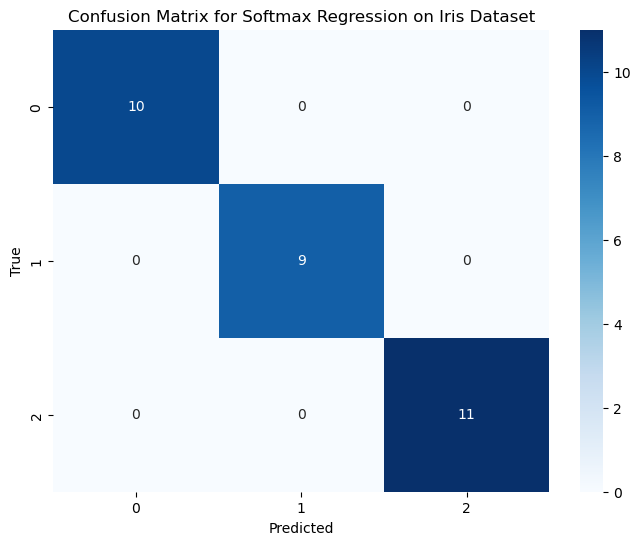

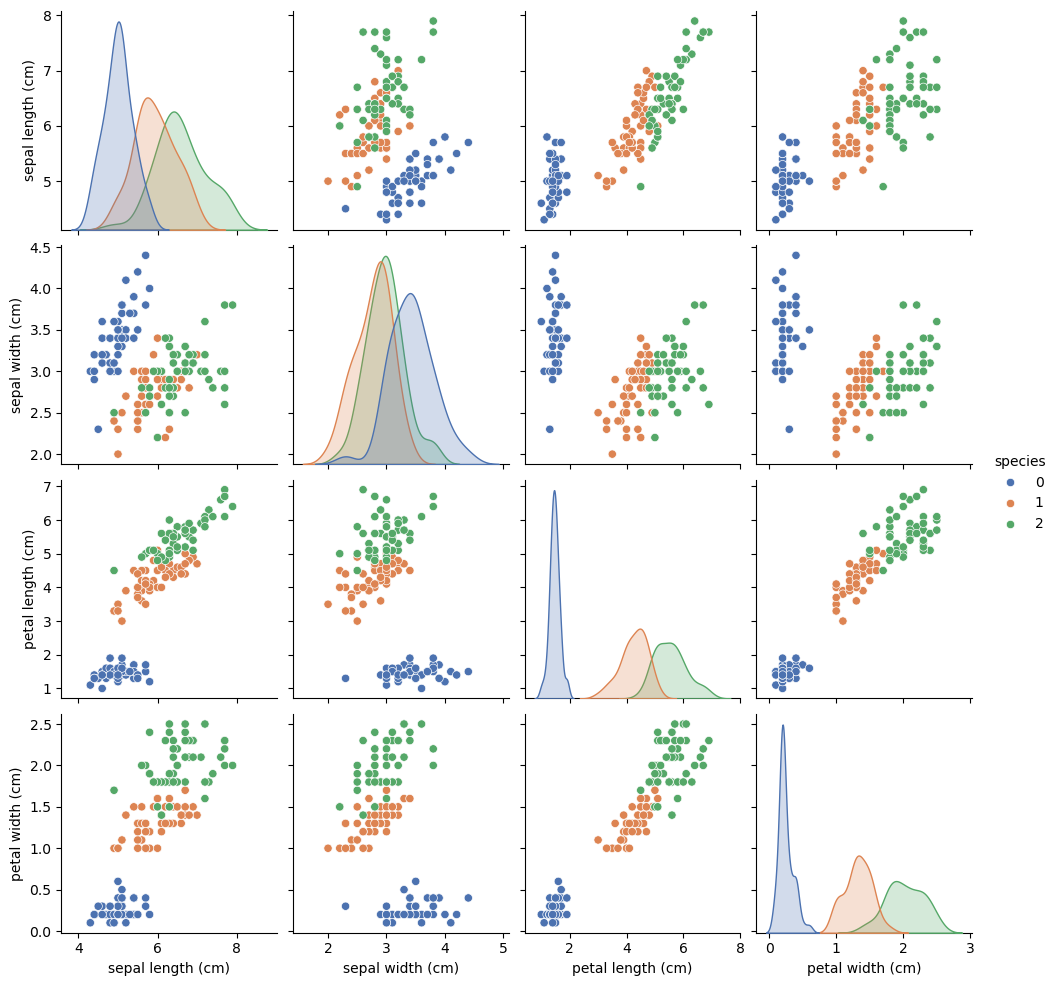

In [16]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Softmax Regression on Iris Dataset')
plt.show()

# Visualize feature distributions
sns.pairplot(df, hue='species', palette='deep', 
             vars=iris.feature_names, 
             hue_order=encoder.classes_)
plt.show()